In [1]:
import qiskit
qiskit.__version__

'1.2.1'

In [2]:
import numpy as np
# Importing standard Qiskit libralies
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

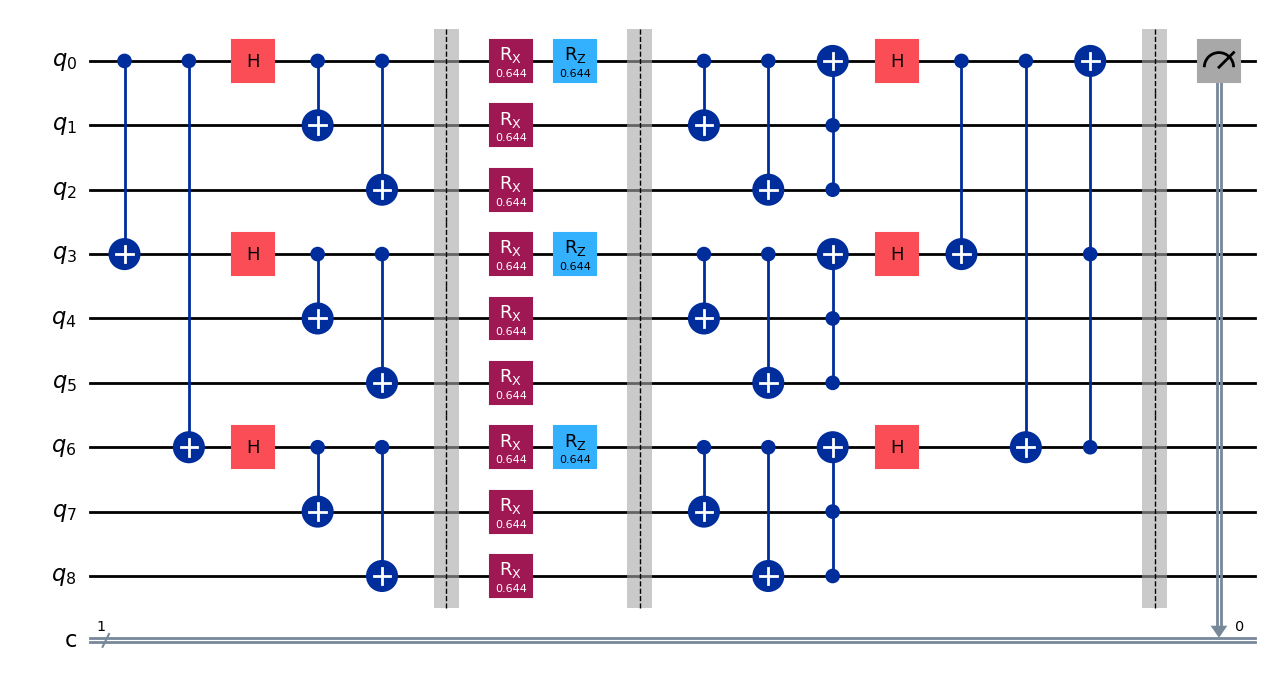

In [3]:
# 量子回路の初期化
circuit = QuantumCircuit(9,1)

# 量子状態の反復とアダマール行列の適用
circuit.cx(0,[3,6])
circuit.h([0,3,6])
circuit.cx(0,[1,2])
circuit.cx(3,[4,5])
circuit.cx(6,[7,8])
circuit.barrier()

# エラー発生
circuit.rx(np.arccos(4/5) , [0,1,2,3,4,5,6,7,8])
circuit.rz(np.arccos(4/5) , [0,3,6])
circuit.barrier()

# 誤り検出・訂正
circuit.cx(0,[1,2])
circuit.ccx(1,2,0)
circuit.cx(3,[4,5])
circuit.ccx(4,5,3)
circuit.cx(6,[7,8])
circuit.ccx(8,7,6)
circuit.h([0,3,6])
circuit.cx(0,[3,6])
circuit.ccx(3,6,0)
circuit.barrier()

# 測定
circuit.measure(0,0)

circuit.draw("mpl")

{'0': 969, '1': 31}


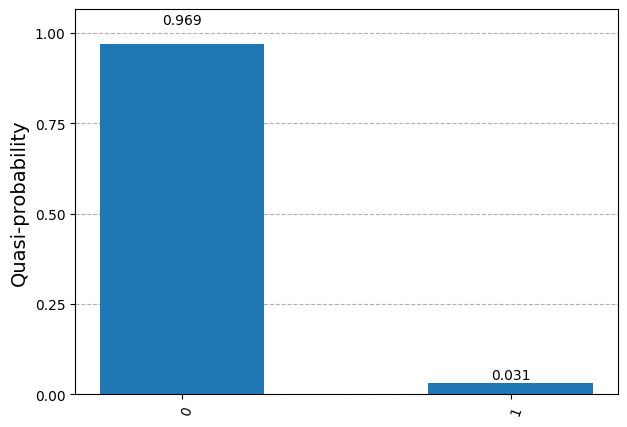

In [4]:
# 実行と結果取得
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(circuit)

sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1000)
result = job.result()

counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_distribution(counts)